<a href="https://colab.research.google.com/github/Manika2219/AI-Powered-Financial-Advisor/blob/main/AI_Powered_Financial_Advisor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [38]:
# Step 2: Load Dataset from Path
file_path = "/content/Finance Dataset.csv"  # Specify the file path
data = pd.read_csv(file_path)

In [39]:
# Display basic info
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
print(data.info())

Dataset Head:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301134 entries, 0 to 30113

In [40]:
# Step 3: Exploratory Data Analysis (EDA)
# Overview of transaction types
print("\n--- Overview of Transaction Types ---")
print(data['type'].value_counts())


--- Overview of Transaction Types ---
type
CASH_OUT    105757
PAYMENT     104491
CASH_IN      63620
TRANSFER     25029
DEBIT         2237
Name: count, dtype: int64


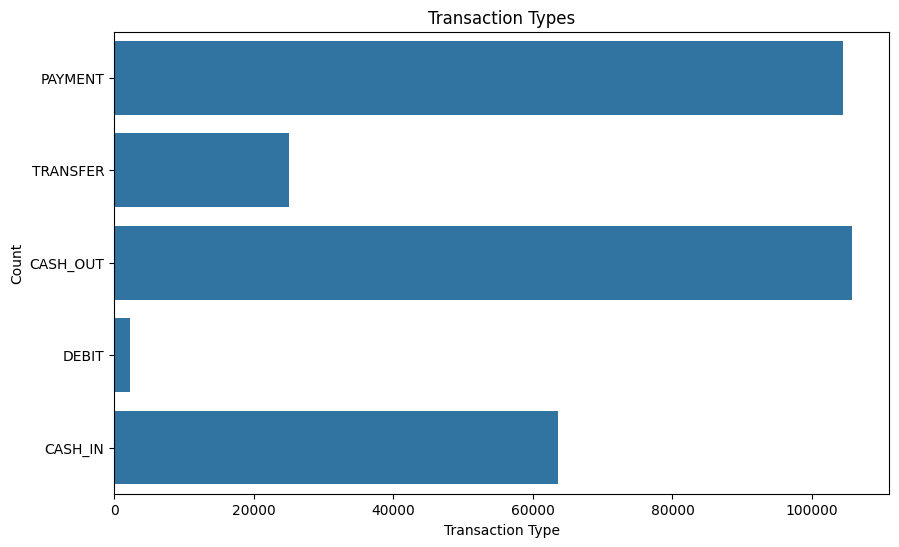

In [41]:
# Visualize distribution of transaction types
plt.figure(figsize=(10, 6))
sns.countplot(data['type'])
plt.title('Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

In [42]:
# Step 4: Data Preprocessing
# Convert categorical 'type' to numerical using LabelEncoder
le_type = LabelEncoder()
data['type'] = le_type.fit_transform(data['type'])

In [43]:
# Handle missing values if any
data = data.fillna(0)

In [44]:
# Step 5: Fraud Detection Modeling
# Define features (X) and target (y)
X = data.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)  # Exclude unnecessary columns
y = data['isFraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score: ", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[90291     0]
 [    0    50]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     90291
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00     90341
   macro avg       1.00      1.00      1.00     90341
weighted avg       1.00      1.00      1.00     90341


Accuracy Score:  1.0



Average Spend by Transaction Type:
 type
0    180034.722302
1    199549.495387
2      7959.930626
3     11859.332616
4    767815.416144
Name: amount, dtype: float64


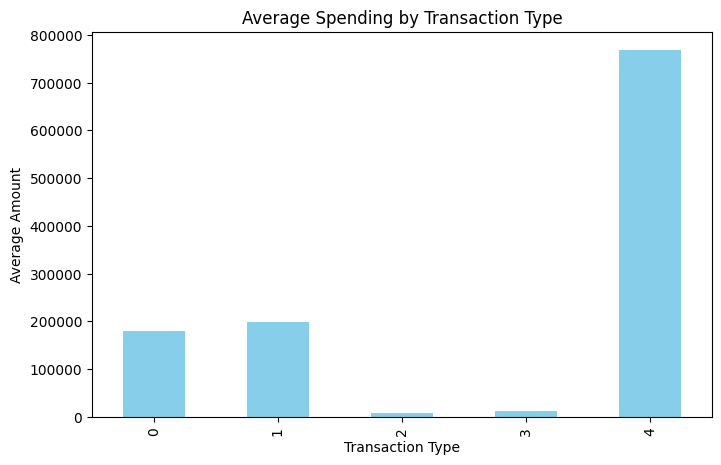

In [45]:
# Step 6: Financial Insights (Budgeting Advice)
# Example: Suggest average spend by transaction type
average_spend = data.groupby('type')['amount'].mean()
print("\nAverage Spend by Transaction Type:\n", average_spend)

# Visualize spending by type
average_spend.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title('Average Spending by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Average Amount')
plt.show()

In [46]:
# Convert the sample transaction to a DataFrame with the same column names
sample_transaction_df = pd.DataFrame([sample_transaction], columns=X_test.columns)

# Compute fraud probability
fraud_probability = rf_model.predict_proba(sample_transaction_df)[0][1] * 100
print(f"Fraud Probability for sample transaction: {fraud_probability:.2f}%")


Fraud Probability for sample transaction: 0.00%


In [30]:
# Step 8: Interactive User Input (Optional)
# Simulate user inputs for financial advice
print("\n--- Financial Advisor ---")
transaction_type = input("Enter transaction type (e.g., CASH-IN, CASH-OUT): ").upper()  # Convert input to uppercase
amount = float(input("Enter transaction amount: "))

# Create a dictionary to map original transaction types to numerical labels
type_mapping = {
    'CASH-IN': 0,
    'CASH-OUT': 1,
    'PAYMENT': 2,
    'TRANSFER': 3,
    'DEBIT': 4
}  # Add other types if needed

# Get the numerical label corresponding to the user's input
type_num = type_mapping.get(transaction_type)
if type_num is None:
    print("Invalid transaction type entered. Please enter one of the following:")
    print(list(type_mapping.keys()))  # Show the valid transaction types
else:
    # Ensure that the 'average_spend' dictionary has the correct values indexed by 'type_num'
    try:
        # Check if it's within average limits
        advice = (
            "Transaction seems normal."
            if amount <= average_spend[type_num]  # Use type_num here to access average_spend
            else "Warning: High amount compared to the average!"
        )
        print(advice)
    except KeyError:
        print(f"Error: The transaction type '{transaction_type}' does not have an average value. Please ensure the mapping is correct.")



--- Financial Advisor ---
Enter transaction type (e.g., CASH-IN, CASH-OUT): Cash-In
Enter transaction amount: 5000000
